# **Background Information**
Customers today have access to a wealth of information, drastically changing the buying cycle. Airlines must proactively acquire customers before they embark on their holidays, utilizing data and predictive models. The key to an effective predictive model is high-quality data; thus, it is crucial to manipulate and prepare the provided customer booking data, evaluate the model's performance, and understand the contribution of each variable to predict holiday purchases accurately.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
data = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')
df= data.copy()
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [84]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [85]:
# dropping the the missing records
df.dropna(inplace=True)


In [86]:
# checking the information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [87]:
# summary statistics of the dataset
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [88]:
# encode categorical variable
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
categorical_column= ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
encoded_data = df[categorical_column].apply(le.fit_transform)

# replacing the categorical column in the datafroam
df[categorical_column] = encoded_data
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [89]:
from sklearn.model_selection import train_test_split

# split the data into featurs and target
X =df.drop('booking_complete', axis = 1)
y =df['booking_complete']

# scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42)


In [90]:
from sklearn.ensemble import RandomForestClassifier

# trianing the random forest model
rf_model = RandomForestClassifier(random_state= 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# evaluating the model using cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv= 5)
cv_mean = cv_scores.mean()
print(f'cross- validation mean score is: {cv_mean}')

cross- validation mean score is: 0.8529777777777777


In [92]:
from sklearn.metrics import classification_report, accuracy_score

# output evalustion of the mode
y_pred =rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8516

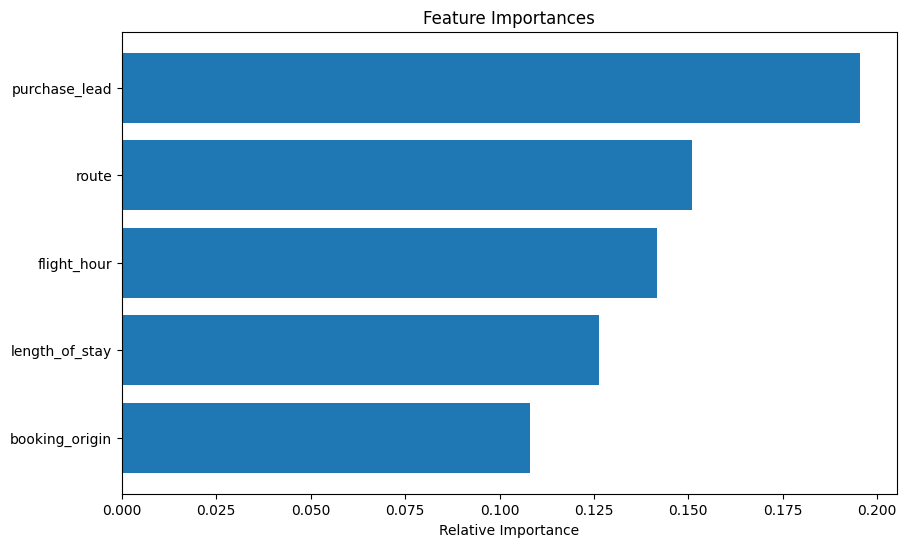

In [93]:
# Visualize the feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-5:]  # Top 5 features

feature_name = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()